In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Read the data
ys = pd.read_csv('data/ys.csv')
ts = pd.read_csv('data/ts.csv')

In [3]:
# MODEL FIT AND PREDICTION

# Parameters of the predictive model. ph is Prediction horizon, mu is Forgetting factor.
ph = 10  
mu = 0.98  

In [4]:
n_s = len(ys)

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)



In [5]:
# At every iteration of the for loop a new sample from CGM is acquired.
for i in range(2, n_s+1):
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    
    # The mu**k assigns the weight to the previous samples.
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
        

    # MODEL
    # Linear Regression.
    lm_tmp = LinearRegression() 
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    # Coefficients of the linear model, y = mx + q 
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # PREDICTION
    tp = ts.iloc[ns-1,0] + ph
    yp = m_tmp*tp + q_tmp
      
    tp_pred[i-2] = tp    
    yp_pred[i-2] = yp



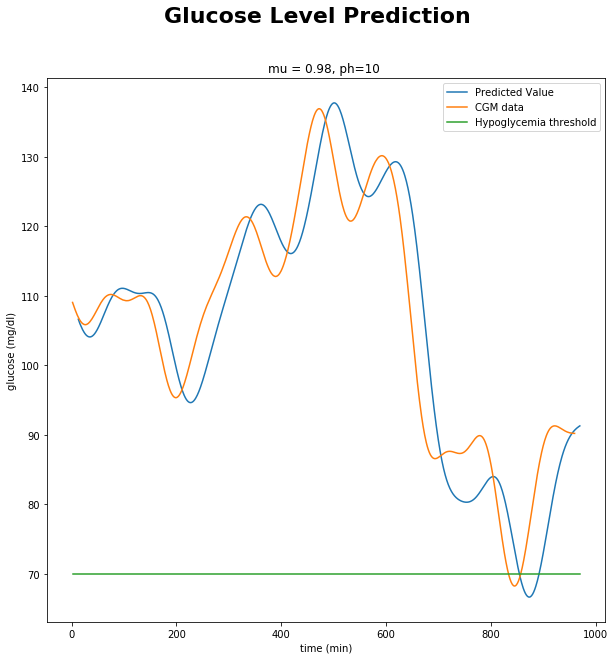

In [6]:
# PLOT
# Hypoglycemia threshold vector.    
t_tot = [l for l in range(int(ts.min()), int(tp_pred.max())+1)]
hypoglycemiaTH = 70*np.ones(len(t_tot)) 
#hyperglycemiaTH = 180*np.ones(len(t_tot))
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value') 
ax.plot(ts.iloc[:,0], ys.iloc[:,0], label='CGM data') 
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
#ax.plot(t_tot, hyperglycemiaTH, label='Hyperglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

In [7]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE is", mse(ys[1:],yp_pred))

RMSE is 27.001869102039027
